In [37]:
import feature_engine.encoding
import feature_engine.pipeline
import feature_engine.selection
import feature_engine.wrappers
import pandas
import pycaret.classification as classification
import sklearn.preprocessing

In [38]:
train_df = pandas.read_csv("train.csv")
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [39]:
pipeline = feature_engine.pipeline.make_pipeline(
    feature_engine.selection.DropFeatures(features_to_drop=["id", "CustomerId", "Surname"]),
    feature_engine.wrappers.SklearnTransformerWrapper(transformer=sklearn.preprocessing.MinMaxScaler(), variables=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]),
    feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary', variables=["Geography", "Gender"]),
)

In [40]:
train_transformed_df = pipeline.fit_transform(train_df)
train_transformed_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.636,0,0,0.202703,0.3,0.000000,2,1.0,0.0,0.907279,0
1,0.554,0,0,0.202703,0.1,0.000000,2,1.0,1.0,0.247483,0
2,0.656,0,0,0.297297,1.0,0.000000,2,1.0,0.0,0.924364,0
3,0.462,0,0,0.216216,0.2,0.593398,1,1.0,1.0,0.422787,0
4,0.732,1,0,0.202703,0.5,0.000000,2,1.0,1.0,0.075293,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,0.634,1,1,0.202703,0.2,0.000000,1,1.0,1.0,0.659179,0
165030,0.884,0,0,0.229730,0.3,0.000000,1,0.0,0.0,0.659177,0
165031,0.430,0,0,0.175676,0.5,0.000000,1,1.0,1.0,0.637151,0
165032,0.408,1,1,0.162162,0.7,0.643819,1,0.0,1.0,0.355841,0


In [41]:
classification.setup(train_transformed_df, target="Exited")

,Description,Value
0,Session id,4090
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(165034, 11)"
4,Transformed data shape,"(165034, 11)"
5,Transformed train set shape,"(115523, 11)"
6,Transformed test set shape,"(49511, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [42]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8655,0.8888,0.5530,0.7459,0.6350,0.5548,0.5642,0.2800
gbc,Gradient Boosting Classifier,0.8650,0.8882,0.5372,0.7539,0.6273,0.5477,0.5594,2.1400
ada,Ada Boost Classifier,0.8613,0.8800,0.5274,0.7425,0.6166,0.5349,0.5467,0.5530
rf,Random Forest Classifier,0.8590,0.8734,0.5374,0.7254,0.6173,0.5333,0.5423,2.1270
et,Extra Trees Classifier,0.8558,0.8667,0.5303,0.7147,0.6087,0.5227,0.5315,1.6940
knn,K Neighbors Classifier,0.8444,0.8207,0.5183,0.6715,0.5850,0.4912,0.4975,1.2660
qda,Quadratic Discriminant Analysis,0.8407,0.8529,0.4866,0.6703,0.5638,0.4694,0.4784,0.0460
lr,Logistic Regression,0.8320,0.8148,0.3713,0.6918,0.4832,0.3936,0.4208,1.0320
lda,Linear Discriminant Analysis,0.8311,0.8155,0.3975,0.6702,0.4990,0.4053,0.4254,0.0370
svm,SVM - Linear Kernel,0.8291,0.8115,0.3054,0.7309,0.4296,0.3488,0.3953,0.0570


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4090, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [43]:
my_model = classification.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8679,0.8914,0.5665,0.7482,0.6448,0.5656,0.5738
1,0.8651,0.8902,0.5603,0.7393,0.6375,0.5566,0.5647
2,0.8652,0.8892,0.5481,0.7478,0.6325,0.5524,0.5624
3,0.8637,0.8840,0.5581,0.7337,0.6340,0.5521,0.5599
4,0.8675,0.8934,0.5610,0.7496,0.6417,0.5625,0.5714
5,0.8597,0.8837,0.5213,0.7386,0.6112,0.5287,0.5406
6,0.8661,0.8912,0.5573,0.7455,0.6378,0.5577,0.5666
7,0.8665,0.8892,0.5458,0.7554,0.6337,0.5547,0.5656
8,0.8650,0.8858,0.5485,0.7467,0.6324,0.5521,0.5620


In [44]:
tuned_model = classification.tune_model(my_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8689,0.8923,0.5624,0.7555,0.6448,0.5665,0.5758
1,0.8657,0.8906,0.5534,0.7463,0.6355,0.5554,0.5647
2,0.8664,0.8895,0.5444,0.7562,0.6331,0.5541,0.5652
3,0.8646,0.8846,0.5528,0.7415,0.6334,0.5525,0.5615
4,0.8679,0.8939,0.5487,0.7602,0.6374,0.5592,0.5703
5,0.8588,0.8842,0.5127,0.7401,0.6058,0.5232,0.5363
6,0.8669,0.8920,0.5491,0.7552,0.6359,0.5569,0.5675
7,0.8663,0.8890,0.5385,0.7598,0.6303,0.5516,0.5638
8,0.8682,0.8853,0.5431,0.7659,0.6356,0.5579,0.5702


Fitting 10 folds for each of 10 candidates, totalling 100 fits


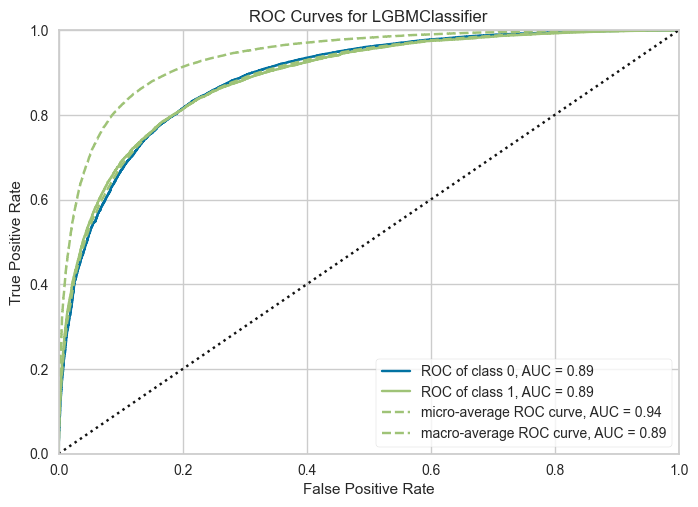

In [45]:
classification.plot_model(tuned_model)

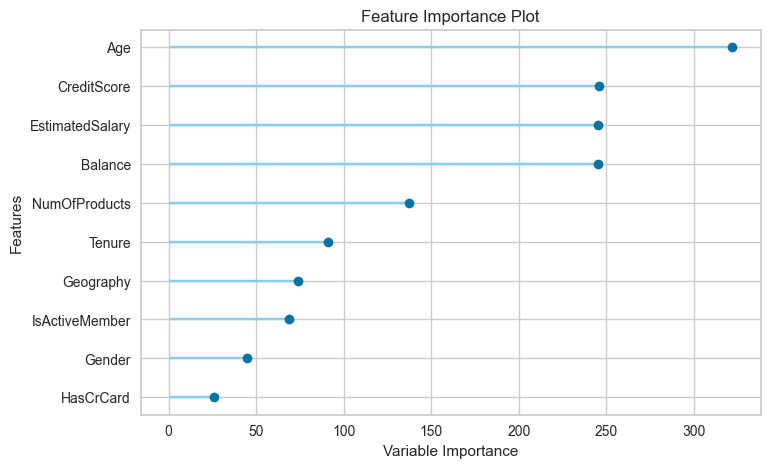

In [46]:
classification.plot_model(tuned_model, plot="feature")

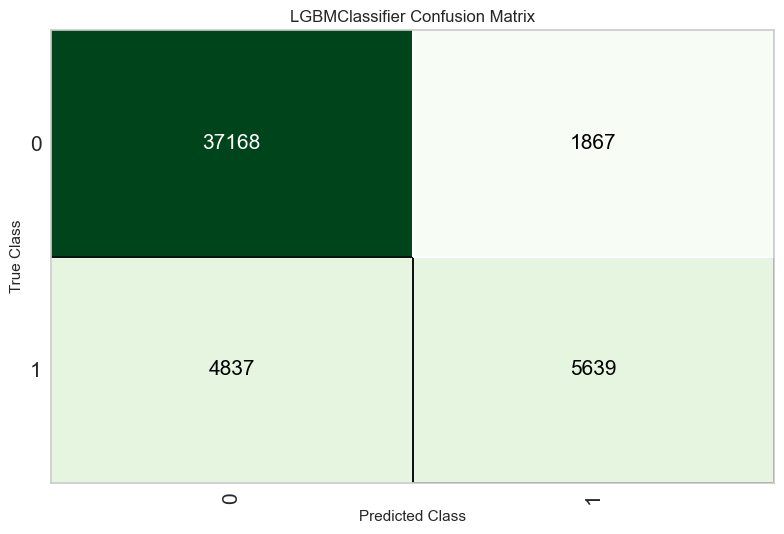

In [47]:
classification.plot_model(tuned_model, plot="confusion_matrix")

In [48]:
final_model = classification.finalize_model(tuned_model)

In [49]:
test_df = pandas.read_csv("test.csv")
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [52]:
test_df["Exited"] = 0
test_transformed_df = pipeline.transform(test_df)
test_transformed_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.472,0,1,0.067568,0.2,0.000000,2,0.0,1.0,0.804903,0
1,0.666,0,1,0.378378,0.2,0.000000,1,1.0,0.0,0.362723,0
2,0.612,0,1,0.216216,0.7,0.000000,2,1.0,0.0,0.694419,0
3,0.662,0,0,0.243243,0.8,0.000000,1,1.0,0.0,0.569654,0
4,0.804,2,0,0.270270,1.0,0.483318,1,1.0,0.0,0.697164,0
...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,1,0,0.148649,0.7,0.462737,1,1.0,1.0,0.740451,0
110019,0.450,0,1,0.243243,0.4,0.709581,1,1.0,1.0,0.210871,0
110020,0.724,0,0,0.175676,0.2,0.000000,2,1.0,0.0,0.081387,0
110021,0.718,0,1,0.189189,0.3,0.000000,1,1.0,1.0,0.794101,0


In [53]:
predicted_df = classification.predict_model(final_model, test_transformed_df)
predicted_df

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8444,0,0.0000,0.0000,0.0000,0.0000,0.0000


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
0,0.472,0,1,0.067568,0.2,0.000000,2,0.0,1.0,0.804903,0,0,0.9727
1,0.666,0,1,0.378378,0.2,0.000000,1,1.0,0.0,0.362723,0,1,0.8080
2,0.612,0,1,0.216216,0.7,0.000000,2,1.0,0.0,0.694419,0,0,0.9721
3,0.662,0,0,0.243243,0.8,0.000000,1,1.0,0.0,0.569654,0,0,0.7717
4,0.804,2,0,0.270270,1.0,0.483318,1,1.0,0.0,0.697164,0,0,0.6021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,1,0,0.148649,0.7,0.462737,1,1.0,1.0,0.740451,0,0,0.9625
110019,0.450,0,1,0.243243,0.4,0.709581,1,1.0,1.0,0.210871,0,0,0.8727
110020,0.724,0,0,0.175676,0.2,0.000000,2,1.0,0.0,0.081387,0,0,0.9823
110021,0.718,0,1,0.189189,0.3,0.000000,1,1.0,1.0,0.794101,0,0,0.8607


In [57]:
submit_df = test_df[["id"]]
submit_df = submit_df.join(predicted_df[["prediction_label"]])
submit_df.to_csv("submit.csv", index=False)